# ARMA Model Practice

Walkthrough of "Time Series Analysis in Python 2022" course offered by 365 Careers on www.udemy.org.
Re-written step by step and modified according to taste.

Agustín Giménez, 2022

## Importing the relevant packages


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts 
import seaborn as sns
sns.set()

# import ARMA model
from statsmodels.tsa.arima_model import ARMA

## Importing the Data and Pre-processing 

In [2]:
raw_csv_data = pd.read_csv("Index2018.csv") 
df_comp=raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst = True)
df_comp.set_index("date", inplace=True)
df_comp=df_comp.asfreq('b')
df_comp=df_comp.fillna(method='ffill')

In [3]:
df_comp['market_value']=df_comp.ftse

In [4]:
del df_comp['spx']
del df_comp['dax']
del df_comp['ftse']
del df_comp['nikkei']
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

## The ACF

Text(0.5, 1.0, 'ACF FTSE')

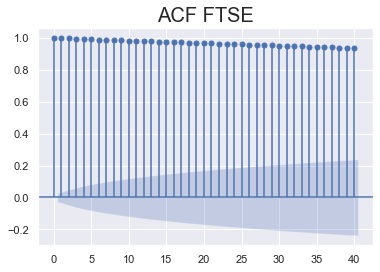

In [5]:
# Plot the Autocorrelation Function (ACF)
sgt.plot_acf(df.market_value, zero=True, lags=40)
plt.title("ACF FTSE", size=20)

## The PACF

Text(0.5, 1.0, 'PACF FTSE')

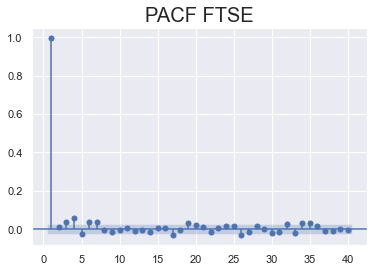

In [6]:
sgt.plot_pacf(df.market_value, zero=False, lags=40)
plt.title("PACF FTSE", size=20)

## Using Returns

In [7]:
# Percentage change between the current and a prior element.
df['returns']=df.market_value.pct_change(1).mul(100)

<ipython-input-7-cb828073d85c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['returns']=df.market_value.pct_change(1).mul(100)


In [8]:
df.head()

,market_value,returns
date,,
1994-01-07,3445.98,NaN
1994-01-10,3440.58,-0.156704
1994-01-11,3413.77,-0.779229
1994-01-12,3372.02,-1.222988
1994-01-13,3360.01,-0.356166


## LLR Test

In [9]:
# import libraries
from scipy.stats.distributions import chi2

# define function for LLR test
def LLR_test(mod_1, mod_2, DF=1):
    L1 = mod_1.fit().llf # log-likelihood
    L2 = mod_2.fit().llf # log-likelihood
    LR = (2*(L2-L1)) # test statistic
    p = chi2.sf(LR,DF).round(3) # p-value
    return LR, p

## Selecting an ARMA Model

### ARMA(1,1)

In [10]:
# Define the model
model_ret_ar_1_ma_1 = ARMA(df.returns[1:], order=(1,1))
results_ret_ar_1_ma_1 = model_ret_ar_1_ma_1.fit()
results_ret_ar_1_ma_1.summary()

C:\Users\agust\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(1, 1)   Log Likelihood               -7916.500
Method:                       css-mle   S.D. of innovations              1.171
Date:                Tue, 14 Jun 2022   AIC                          15841.000
Time:                        10:47:16   BIC                          15867.085
Sample:                    01-10-1994   HQIC                         15850.140
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.013      1.446      0.148      -0.007       0.045
ar.L1.returns     0.7649      0.067     11.349      0.000       0.633       0.897
ma.L1.returns    -0.8141      0.061    -13.406      0.000      -0.933      -0.695
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.3074           +0.0000j            1.3074            0.0000
MA.1            1.2284           +0.0000j            1.2284            0.0000
-----------------------------------------------------------------------------
"""

We see that only the constant coefficient is not significantly different from  0.

#### Log-Likelihood Test

In [11]:
# model for returns
model_ret_ar_1 = ARMA(df.returns[1:], order=(1,0))
model_ret_ma_1 = ARMA(df.returns[1:], order=(0,1))

C:\Users\agust\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [12]:
# Log-likelihood test
# DF=1 (i.e. 2 minus 1)
print("\nARMA vs AR ", LLR_test(model_ret_ar_1, model_ret_ar_1_ma_1, DF=1))
print("\nARMA vs AM ", LLR_test(model_ret_ma_1, model_ret_ar_1_ma_1, DF=1))


ARMA vs AR  (26.497643547931148, 0.0)

ARMA vs AM  (26.19021240744405, 0.0)


Using past errors in conjunction with past values results in much better estimators. Our past estimators perform better as predictors than actual past values.

### ARMA(3,3)

In [13]:
# Define the model
model_ret_ar_3_ma_3 = ARMA(df.returns[1:], order=(3,3))
results_ret_ar_3_ma_3 = model_ret_ar_3_ma_3.fit()
results_ret_ar_3_ma_3.summary()

C:\Users\agust\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(3, 3)   Log Likelihood               -7893.515
Method:                       css-mle   S.D. of innovations              1.166
Date:                Tue, 14 Jun 2022   AIC                          15803.030
Time:                        10:47:22   BIC                          15855.199
Sample:                    01-10-1994   HQIC                         15821.310
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.014      1.395      0.163      -0.008       0.045
ar.L1.returns    -0.1898      0.104     -1.827      0.068      -0.393       0.014
ar.L2.returns    -0.2942      0.087     -3.389      0.001      -0.464      -0.124
ar.L3.returns     0.4459      0.138      3.225      0.001       0.175       0.717
ma.L1.returns     0.1707      0.099      1.726      0.084      -0.023       0.365
ma.L2.returns     0.2277      0.084      2.701      0.007       0.062       0.393
ma.L3.returns    -0.5432      0.127     -4.270      0.000      -0.793      -0.294
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.5168           -1.0283j            1.1508           -0.3241
AR.2           -0.5168           +1.0283j            1.1508            0.3241
AR.3            1.6932           -0.0000j            1.6932           -0.0000
MA.1           -0.5286           -0.9835j            1.1166           -0.3285
MA.2           -0.5286           +0.9835j            1.1166            0.3285
MA.3            1.4764           -0.0000j            1.4764           -0.0000
-----------------------------------------------------------------------------
"""

In [14]:
# Log-likelihood test ARMA(3,3) vs ARMA(1,1)
# DF=4 (i.e. 6 minus 2)
print("\nARMA(3,3) vs ARMA(1,1) ", LLR_test(model_ret_ar_1_ma_1, model_ret_ar_3_ma_3, DF=4))


ARMA(3,3) vs ARMA(1,1)  (45.97028058781507, 0.0)


### ARMA(3,2)

In [15]:
# Define the model
model_ret_ar_3_ma_2 = ARMA(df.returns[1:], order=(3,2))
results_ret_ar_3_ma_2 = model_ret_ar_3_ma_2.fit()
results_ret_ar_3_ma_2.summary()

C:\Users\agust\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(3, 2)   Log Likelihood               -7895.747
Method:                       css-mle   S.D. of innovations              1.166
Date:                Tue, 14 Jun 2022   AIC                          15805.495
Time:                        10:47:29   BIC                          15851.143
Sample:                    01-10-1994   HQIC                         15821.491
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0188      0.015      1.251      0.211      -0.011       0.048
ar.L1.returns    -0.6785      0.087     -7.799      0.000      -0.849      -0.508
ar.L2.returns    -0.5088      0.139     -3.670      0.000      -0.780      -0.237
ar.L3.returns    -0.1141      0.015     -7.655      0.000      -0.143      -0.085
ma.L1.returns     0.6568      0.087      7.536      0.000       0.486       0.828
ma.L2.returns     0.4474      0.141      3.175      0.001       0.171       0.724
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.4929           -1.5101j            1.5885           -0.3002
AR.2           -0.4929           +1.5101j            1.5885            0.3002
AR.3           -3.4748           -0.0000j            3.4748           -0.5000
MA.1           -0.7340           -1.3025j            1.4951           -0.3317
MA.2           -0.7340           +1.3025j            1.4951            0.3317
-----------------------------------------------------------------------------
"""

Notice that all coefficient p-values are significant. Hence, we do not need to perform a LLR test.
Positive $\theta_{i}$ coefficients suggest calibration efforts.
Negative $\varphi_{i}$ coefficients match our expectations of an efficient market with a mean of 0 over time.

### ARMA(2,3)

In [16]:
# Define the model
model_ret_ar_2_ma_3 = ARMA(df.returns[1:], order=(2,3))
results_ret_ar_2_ma_3 = model_ret_ar_2_ma_3.fit()
results_ret_ar_2_ma_3.summary()

C:\Users\agust\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(2, 3)   Log Likelihood               -7895.587
Method:                       css-mle   S.D. of innovations              1.166
Date:                Tue, 14 Jun 2022   AIC                          15805.174
Time:                        10:47:31   BIC                          15850.823
Sample:                    01-10-1994   HQIC                         15821.170
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.015      1.276      0.202      -0.010       0.048
ar.L1.returns    -0.5605      0.090     -6.245      0.000      -0.736      -0.385
ar.L2.returns    -0.4187      0.193     -2.172      0.030      -0.796      -0.041
ma.L1.returns     0.5378      0.090      6.001      0.000       0.362       0.714
ma.L2.returns     0.3540      0.195      1.818      0.069      -0.028       0.736
ma.L3.returns    -0.1158      0.016     -7.369      0.000      -0.147      -0.085
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.6694           -1.3930j            1.5455           -0.3213
AR.2           -0.6694           +1.3930j            1.5455            0.3213
MA.1           -0.7270           -1.1772j            1.3836           -0.3381
MA.2           -0.7270           +1.1772j            1.3836            0.3381
MA.3            4.5097           -0.0000j            4.5097           -0.0000
-----------------------------------------------------------------------------
"""

The $\theta_{t-2}$ coefficient is not significant. Hence, we should avoid using this model, as it is less performing than the ARMA (3,3) model.

### ARMA(3,1)

In [17]:
# Define the model
model_ret_ar_3_ma_1 = ARMA(df.returns[1:], order=(3,1))
results_ret_ar_3_ma_1 = model_ret_ar_3_ma_1.fit()
results_ret_ar_3_ma_1.summary()

C:\Users\agust\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(3, 1)   Log Likelihood               -7899.072
Method:                       css-mle   S.D. of innovations              1.167
Date:                Tue, 14 Jun 2022   AIC                          15810.144
Time:                        10:47:32   BIC                          15849.271
Sample:                    01-10-1994   HQIC                         15823.855
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.015      1.298      0.194      -0.010       0.047
ar.L1.returns    -0.5077      0.088     -5.769      0.000      -0.680      -0.335
ar.L2.returns    -0.0638      0.016     -4.023      0.000      -0.095      -0.033
ar.L3.returns    -0.1102      0.014     -7.850      0.000      -0.138      -0.083
ma.L1.returns     0.4839      0.088      5.500      0.000       0.311       0.656
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.5095           -0.0000j            1.5095           -0.5000
AR.2            0.4653           -2.4076j            2.4521           -0.2196
AR.3            0.4653           +2.4076j            2.4521            0.2196
MA.1           -2.0668           +0.0000j            2.0668            0.5000
-----------------------------------------------------------------------------
"""

In [18]:
# LLR Test
# DF=1 (i.e. 5 minus 4)
print("\nARMA(3,2) vs ARMA(3,1) ", LLR_test(model_ret_ar_3_ma_1, model_ret_ar_3_ma_2, DF=1))


ARMA(3,2) vs ARMA(3,1)  (6.649362557984205, 0.01)


p-value 0.01 < 0.05 is significant. Hence, we can say that the more complicated model, i.e. ARMA(3,2), is the better approximator.

### ARMA(2,2)

In [19]:
# Define the model
model_ret_ar_2_ma_2 = ARMA(df.returns[1:], order=(2,2))
results_ret_ar_2_ma_2 = model_ret_ar_2_ma_2.fit()
results_ret_ar_2_ma_2.summary()

C:\Users\agust\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(2, 2)   Log Likelihood               -7913.223
Method:                       css-mle   S.D. of innovations              1.170
Date:                Tue, 14 Jun 2022   AIC                          15838.446
Time:                        10:47:37   BIC                          15877.573
Sample:                    01-10-1994   HQIC                         15852.156
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.014      1.394      0.163      -0.008       0.045
ar.L1.returns     0.7820      0.238      3.284      0.001       0.315       1.249
ar.L2.returns    -0.1563      0.177     -0.884      0.377      -0.503       0.190
ma.L1.returns    -0.8104      0.239     -3.388      0.001      -1.279      -0.342
ma.L2.returns     0.1177      0.187      0.628      0.530      -0.250       0.485
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.5018           -0.3736j            2.5295           -0.0236
AR.2            2.5018           +0.3736j            2.5295            0.0236
MA.1            1.6107           +0.0000j            1.6107            0.0000
MA.2            5.2743           +0.0000j            5.2743            0.0000
-----------------------------------------------------------------------------
"""

We that that two of the ARMA(2,2) coefficients are not significant. Interestingly, these are the coefficients associated with the $t-2$ lag. This suggests that ARMA(1,2) and ARMA(2,1) would outperform this model.

In [20]:
# LLR Test
# DF=1 (i.e. 5 minus 4)
print("\nARMA(3,2) vs ARMA(2,2) ", LLR_test(model_ret_ar_2_ma_2, model_ret_ar_3_ma_2, DF=1))


ARMA(3,2) vs ARMA(2,2)  (34.95067862201722, 0.0)


The more complicated model, i.e. ARMA(3,2), is the better predictor.

### ARMA(1,3)

In [21]:
# Define the model
model_ret_ar_1_ma_3 = ARMA(df.returns[1:], order=(1,3))
results_ret_ar_1_ma_3 = model_ret_ar_1_ma_3.fit()
results_ret_ar_1_ma_3.summary()

C:\Users\agust\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(1, 3)   Log Likelihood               -7896.838
Method:                       css-mle   S.D. of innovations              1.167
Date:                Tue, 14 Jun 2022   AIC                          15805.676
Time:                        10:47:41   BIC                          15844.803
Sample:                    01-10-1994   HQIC                         15819.386
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.014      1.332      0.183      -0.009       0.047
ar.L1.returns    -0.4699      0.096     -4.901      0.000      -0.658      -0.282
ma.L1.returns     0.4474      0.095      4.691      0.000       0.260       0.634
ma.L2.returns    -0.0637      0.015     -4.113      0.000      -0.094      -0.033
ma.L3.returns    -0.1182      0.014     -8.200      0.000      -0.146      -0.090
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -2.1282           +0.0000j            2.1282            0.5000
MA.1           -1.4882           -1.1206j            1.8629           -0.3973
MA.2           -1.4882           +1.1206j            1.8629            0.3973
MA.3            2.4376           -0.0000j            2.4376           -0.0000
-----------------------------------------------------------------------------
"""

#### Log-Likelihood Ratio Test
We cannot compare ARMA(1,3) with ARMA(3,2), because these models aren't nested. That is because ARMA(1,3) contains more MA parts than ARMA(3,2).

When this happens, we manually compare the Log-likelihoods and AICs of both models.

In [22]:
print("\nARMA(3,2): LL = ", results_ret_ar_3_ma_2.llf, "\tAIC = ", results_ret_ar_3_ma_2.aic) 
print("\nARMA(1,3): LL = ", results_ret_ar_1_ma_3.llf, "\tAIC = ", results_ret_ar_1_ma_3.aic)


ARMA(3,2): LL =  -7895.747458514521 	AIC =  15805.494917029042

ARMA(1,3): LL =  -7896.837893752809 	AIC =  15805.675787505617


We see that the ARMA(3,2) model outperforms its simpler counterpart (i.e. has a higher LL and a lower AIC)

### ARMA(1,2)

In [23]:
# Define the model
model_ret_ar_1_ma_2 = ARMA(df.returns[1:], order=(1,2))
results_ret_ar_1_ma_2 = model_ret_ar_1_ma_2.fit()
results_ret_ar_1_ma_2.summary()

C:\Users\agust\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(1, 2)   Log Likelihood               -7913.670
Method:                       css-mle   S.D. of innovations              1.171
Date:                Tue, 14 Jun 2022   AIC                          15837.341
Time:                        10:47:42   BIC                          15869.947
Sample:                    01-10-1994   HQIC                         15848.766
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.013      1.410      0.158      -0.007       0.045
ar.L1.returns     0.6169      0.100      6.191      0.000       0.422       0.812
ma.L1.returns    -0.6471      0.100     -6.496      0.000      -0.842      -0.452
ma.L2.returns    -0.0422      0.017     -2.545      0.011      -0.075      -0.010
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.6210           +0.0000j            1.6210            0.0000
MA.1            1.4150           +0.0000j            1.4150            0.0000
MA.2          -16.7597           +0.0000j           16.7597            0.5000
-----------------------------------------------------------------------------
"""

In [24]:
# LLR Test
# DF=2
print("\nARMA(3,2) vs ARMA(1,2) ", LLR_test(model_ret_ar_1_ma_2, model_ret_ar_3_ma_2, DF=2))


ARMA(3,2) vs ARMA(1,2)  (35.84567872136904, 0.0)


We see that the ARMA(3,2) model outperforms its simpler counterpart.

### ARMA(2,1)

In [25]:
# Define the model
model_ret_ar_2_ma_1 = ARMA(df.returns[1:], order=(2,1))
results_ret_ar_2_ma_1 = model_ret_ar_2_ma_1.fit()
results_ret_ar_2_ma_1.summary()

C:\Users\agust\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(2, 1)   Log Likelihood               -7913.456
Method:                       css-mle   S.D. of innovations              1.171
Date:                Tue, 14 Jun 2022   AIC                          15836.913
Time:                        10:47:45   BIC                          15869.519
Sample:                    01-10-1994   HQIC                         15848.338
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.013      1.405      0.160      -0.007       0.045
ar.L1.returns     0.6541      0.093      7.068      0.000       0.473       0.835
ar.L2.returns    -0.0433      0.017     -2.593      0.010      -0.076      -0.011
ma.L1.returns    -0.6829      0.092     -7.431      0.000      -0.863      -0.503
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.7262           +0.0000j            1.7262            0.0000
AR.2           13.3732           +0.0000j           13.3732            0.0000
MA.1            1.4643           +0.0000j            1.4643            0.0000
-----------------------------------------------------------------------------
"""

In [26]:
# LLR Test
# DF=2
print("\nARMA(3,2) vs ARMA(1,2) ", LLR_test(model_ret_ar_2_ma_1, model_ret_ar_3_ma_2, DF=2))


ARMA(3,2) vs ARMA(1,2)  (35.41775537266949, 0.0)


#### We see that the ARMA(3,2) is still the better model.

## Residuals of Returns

<ipython-input-27-ef0d22a8fdf8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['res_ret_ar_3_ma_2'] = results_ret_ar_3_ma_2.resid[1:]


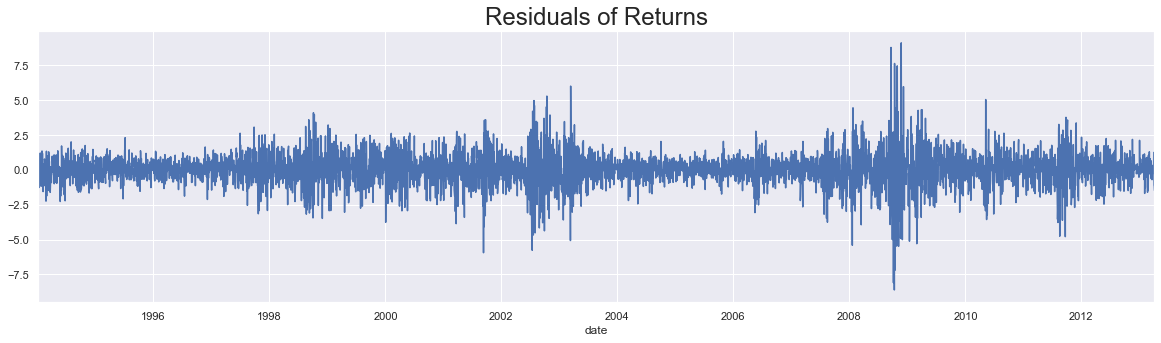

In [27]:
# extract residuals from model results
df['res_ret_ar_3_ma_2'] = results_ret_ar_3_ma_2.resid[1:]

# plot the residuals
df.res_ret_ar_3_ma_2.plot(figsize=(20,5))
plt.title("Residuals of Returns", size=24)
plt.show()

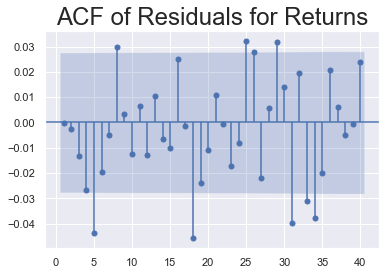

In [28]:
# plot the autocorrelation function (ACF)
sgt.plot_acf(df.res_ret_ar_3_ma_2[2:], zero=False, lags=40)
plt.title("ACF of Residuals for Returns", size=24)
plt.show()

Accounting for  either returns or residuals 5 periods ago could improve our predictions.

## Reevaluating Model Selection

### ARMA(5,5)

In [29]:
# Define the model
model_ret_ar_5_ma_5 = ARMA(df.returns[1:], order=(5,5))
results_ret_ar_5_ma_5 = model_ret_ar_5_ma_5.fit()
results_ret_ar_5_ma_5.summary()

C:\Users\agust\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(5, 5)   Log Likelihood               -7882.160
Method:                       css-mle   S.D. of innovations              1.163
Date:                Tue, 14 Jun 2022   AIC                          15788.321
Time:                        10:48:04   BIC                          15866.575
Sample:                    01-10-1994   HQIC                         15815.742
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.013      1.402      0.161      -0.008       0.045
ar.L1.returns    -0.0684      0.140     -0.490      0.624      -0.342       0.205
ar.L2.returns    -0.6722      0.146     -4.603      0.000      -0.958      -0.386
ar.L3.returns    -0.1152      0.141     -0.817      0.414      -0.392       0.161
ar.L4.returns     0.1779      0.129      1.381      0.167      -0.075       0.430
ar.L5.returns     0.1215      0.107      1.132      0.258      -0.089       0.332
ma.L1.returns     0.0443      0.138      0.322      0.748      -0.226       0.314
ma.L2.returns     0.6223      0.144      4.321      0.000       0.340       0.905
ma.L3.returns     0.0107      0.136      0.079      0.937      -0.256       0.277
ma.L4.returns    -0.1753      0.122     -1.436      0.151      -0.415       0.064
ma.L5.returns    -0.2240      0.104     -2.148      0.032      -0.428      -0.020
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.0870           -1.0364j            1.0401           -0.2367
AR.2            0.0870           +1.0364j            1.0401            0.2367
AR.3            1.7715           -0.0000j            1.7715           -0.0000
AR.4           -1.7050           -1.1784j            2.0726           -0.4038
AR.5           -1.7050           +1.1784j            2.0726            0.4038
MA.1            0.1033           -1.0434j            1.0485           -0.2343
MA.2            0.1033           +1.0434j            1.0485            0.2343
MA.3            1.4855           -0.0000j            1.4855           -0.0000
MA.4           -1.2373           -1.0965j            1.6532           -0.3846
MA.5           -1.2373           +1.0965j            1.6532            0.3846
-----------------------------------------------------------------------------
"""

Go through all 8 remaining  models to see which ones yield significant coefficients at the 5% level.

### ARMA(5,1)

In [30]:
# Define the model
model_ret_ar_5_ma_1 = ARMA(df.returns[1:], order=(5,1))
results_ret_ar_5_ma_1 = model_ret_ar_5_ma_1.fit()
results_ret_ar_5_ma_1.summary()

C:\Users\agust\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(5, 1)   Log Likelihood               -7889.311
Method:                       css-mle   S.D. of innovations              1.165
Date:                Tue, 14 Jun 2022   AIC                          15794.623
Time:                        10:48:08   BIC                          15846.792
Sample:                    01-10-1994   HQIC                         15812.903
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.013      1.407      0.159      -0.007       0.045
ar.L1.returns     0.3440      0.131      2.624      0.009       0.087       0.601
ar.L2.returns    -0.0458      0.015     -3.005      0.003      -0.076      -0.016
ar.L3.returns    -0.0652      0.016     -4.010      0.000      -0.097      -0.033
ar.L4.returns     0.0741      0.018      4.068      0.000       0.038       0.110
ar.L5.returns    -0.0813      0.014     -5.688      0.000      -0.109      -0.053
ma.L1.returns    -0.3673      0.131     -2.801      0.005      -0.624      -0.110
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.6158           -0.0000j            1.6158           -0.5000
AR.2            1.3793           -0.8613j            1.6261           -0.0888
AR.3            1.3793           +0.8613j            1.6261            0.0888
AR.4           -0.1156           -1.6929j            1.6968           -0.2608
AR.5           -0.1156           +1.6929j            1.6968            0.2608
MA.1            2.7223           +0.0000j            2.7223            0.0000
-----------------------------------------------------------------------------
"""

### ARMA(1,5)

In [31]:
# Define the model
model_ret_ar_1_ma_5 = ARMA(df.returns[1:], order=(1,5))
results_ret_ar_1_ma_5 = model_ret_ar_1_ma_5.fit()
results_ret_ar_1_ma_5.summary()

C:\Users\agust\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(1, 5)   Log Likelihood               -7890.973
Method:                       css-mle   S.D. of innovations              1.165
Date:                Tue, 14 Jun 2022   AIC                          15797.947
Time:                        10:48:09   BIC                          15850.116
Sample:                    01-10-1994   HQIC                         15816.228
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.013      1.419      0.156      -0.007       0.045
ar.L1.returns     0.3285      0.152      2.159      0.031       0.030       0.627
ma.L1.returns    -0.3534      0.152     -2.332      0.020      -0.650      -0.056
ma.L2.returns    -0.0404      0.015     -2.624      0.009      -0.071      -0.010
ma.L3.returns    -0.0679      0.017     -4.022      0.000      -0.101      -0.035
ma.L4.returns     0.0742      0.020      3.771      0.000       0.036       0.113
ma.L5.returns    -0.0683      0.015     -4.660      0.000      -0.097      -0.040
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            3.0443           +0.0000j            3.0443            0.0000
MA.1           -1.1897           -1.1548j            1.6580           -0.3774
MA.2           -1.1897           +1.1548j            1.6580            0.3774
MA.3            1.5041           -0.0000j            1.5041           -0.0000
MA.4            0.9809           -1.6057j            1.8815           -0.1627
MA.5            0.9809           +1.6057j            1.8815            0.1627
-----------------------------------------------------------------------------
"""

#### Compare ARMA(5,1) with ARMA(1,5)

In [32]:
# Both models have the same number of Degrees of Freedom
print("\nARMA(5,1): LL = ", results_ret_ar_5_ma_1.llf, "\tAIC = ", results_ret_ar_5_ma_1.aic) 
print("\nARMA(1,5): LL = ", results_ret_ar_1_ma_5.llf, "\tAIC = ", results_ret_ar_1_ma_5.aic)


ARMA(5,1): LL =  -7889.311282945813 	AIC =  15794.622565891626

ARMA(1,5): LL =  -7890.973460209563 	AIC =  15797.946920419126


##### ARMA(5,1) yields a higher likelihood, while requesting lower information criteria. Hence, it is the superior choice between the two models.

#### Compare ARMA(5,1) with ARMA(3,2)

In [33]:
# Models are not "nested"
print("\nARMA(5,1): LL = ", results_ret_ar_5_ma_1.llf, "\tAIC = ", results_ret_ar_5_ma_1.aic) 
print("\nARMA(3,2): LL = ", results_ret_ar_3_ma_2.llf, "\tAIC = ", results_ret_ar_3_ma_2.aic)


ARMA(5,1): LL =  -7889.311282945813 	AIC =  15794.622565891626

ARMA(3,2): LL =  -7895.747458514521 	AIC =  15805.494917029042


##### Once again, the ARMA(5,1) model yields a higher likelihood, while requesting lower information criteria. Hence, it is the superior choice between the two models.

We can start off with a model whose order is lower than the optimal one. That is why examining the residuals is crucial in finding the best approximator.

### Residuals for the New Model

In [34]:
# extract residuals
df['res_ret_ar_5_ma_1'] = results_ret_ar_5_ma_1.resid[1:]

<ipython-input-34-dc5353d61d20>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['res_ret_ar_5_ma_1'] = results_ret_ar_5_ma_1.resid[1:]


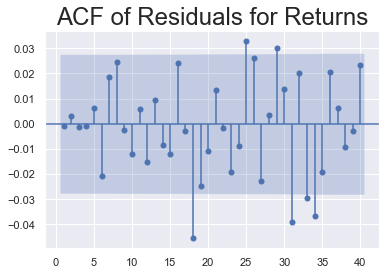

In [35]:
# plot the autocorrelation function (ACF)
sgt.plot_acf(df.res_ret_ar_5_ma_1[2:], zero=False, lags=40)
plt.title("ACF of Residuals for Returns", size=24)
plt.show()

We see that no residual before the 18th lag is significant!

## ARMA for Prices

Non-stationary data

<ipython-input-36-163d981a047b>:2: FutureWarning: the 'unbiased'' keyword is deprecated, use 'adjusted' instead
  sgt.plot_acf(df.market_value, unbiased=True, zero=False,lags=40)


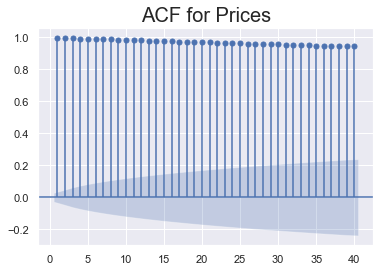

In [36]:
# Plot ACF
sgt.plot_acf(df.market_value, unbiased=True, zero=False,lags=40)
plt.title("ACF for Prices",size=20)
plt.show()

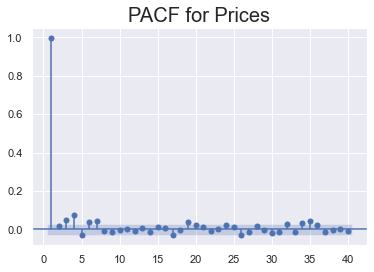

In [37]:
# Plot PACF with 95% confidence intervals
sgt.plot_pacf(df.market_value, alpha=0.05, zero=False,lags=40, method=('ols'))
plt.title("PACF for Prices",size=20)
plt.show()

### ARMA(1,1)

In [38]:
# build the model
model_ar_1_ma_1 = ARMA(df.market_value, order=(1,1))
results_ar_1_ma_1 = model_ar_1_ma_1.fit()
results_ar_1_ma_1.summary()

C:\Users\agust\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(1, 1)   Log Likelihood              -27621.784
Method:                       css-mle   S.D. of innovations             59.248
Date:                Tue, 14 Jun 2022   AIC                          55251.569
Time:                        10:48:12   BIC                          55277.654
Sample:                    01-07-1994   HQIC                         55260.709
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5052.0380    495.278     10.200      0.000    4081.311    6022.765
ar.L1.market_value     0.9985      0.001   1325.316      0.000       0.997       1.000
ma.L1.market_value    -0.0190      0.015     -1.274      0.203      -0.048       0.010
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0015           +0.0000j            1.0015            0.0000
MA.1           52.5147           +0.0000j           52.5147            0.0000
-----------------------------------------------------------------------------
"""

In [39]:
# get residuals
df['res_ar_1_ma_1'] = results_ar_1_ma_1.resid

<ipython-input-39-87df199e6323>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['res_ar_1_ma_1'] = results_ar_1_ma_1.resid


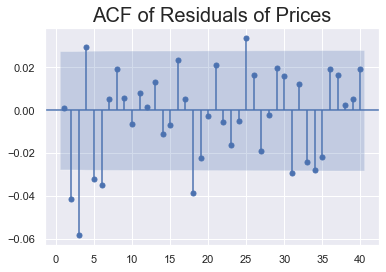

In [40]:
# Plot ACF
sgt.plot_acf(df.res_ar_1_ma_1, zero=False,lags=40)
plt.title("ACF of Residuals of Prices",size=20)
plt.show()

We see that 5 of the first 6 lags are significant, so we must amend this.

### ARMA(6,6)

In [41]:
# build the model
model_ar_6_ma_6 = ARMA(df.market_value, order=(6,6))
results_ar_6_ma_6 = model_ar_6_ma_6.fit(start_ar_lags = 11) # we pass our own parameter to avoid error
results_ar_6_ma_6.summary()

C:\Users\agust\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(6, 6)   Log Likelihood              -27587.932
Method:                       css-mle   S.D. of innovations             58.849
Date:                Tue, 14 Jun 2022   AIC                          55203.864
Time:                        10:48:21   BIC                          55295.164
Sample:                    01-07-1994   HQIC                         55235.856
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.6480    568.543      8.952      0.000    3975.324    6203.972
ar.L1.market_value     1.9274      0.032     59.971      0.000       1.864       1.990
ar.L2.market_value    -1.7356      0.040    -43.388      0.000      -1.814      -1.657
ar.L3.market_value     1.2673      0.034     36.741      0.000       1.200       1.335
ar.L4.market_value    -0.2370      0.159     -1.493      0.135      -0.548       0.074
ar.L5.market_value    -0.4065      0.166     -2.449      0.014      -0.732      -0.081
ar.L6.market_value     0.1840      0.049      3.773      0.000       0.088       0.280
ma.L1.market_value    -0.9484      0.035    -27.055      0.000      -1.017      -0.880
ma.L2.market_value     0.7798      0.032     24.152      0.000       0.716       0.843
ma.L3.market_value    -0.5082      0.031    -16.322      0.000      -0.569      -0.447
ma.L4.market_value    -0.1563      0.159     -0.980      0.327      -0.469       0.156
ma.L5.market_value     0.0953      0.057      1.682      0.093      -0.016       0.206
ma.L6.market_value     0.0670      0.024      2.796      0.005       0.020       0.114
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.0857           -1.0502j            1.0537           -0.2370
AR.2            0.0857           +1.0502j            1.0537            0.2370
AR.3           -2.0250           -0.0000j            2.0250           -0.5000
AR.4            1.0011           -0.0000j            1.0011           -0.0000
AR.5            1.5306           -0.2674j            1.5538           -0.0275
AR.6            1.5306           +0.2674j            1.5538            0.0275
MA.1            0.1028           -1.0612j            1.0662           -0.2346
MA.2            0.1028           +1.0612j            1.0662            0.2346
MA.3            1.3623           -0.2797j            1.3908           -0.0322
MA.4            1.3623           +0.2797j            1.3908            0.0322
MA.5           -2.1761           -1.4330j            2.6056           -0.4073
MA.6           -2.1761           +1.4330j            2.6056            0.4073
-----------------------------------------------------------------------------
"""

Notice that some of the coefficients are not significant. Therefore, we should reduce the total number of lags and conduct a trial and error approach. We should try all models which contain either 6 AR lags or 6 MA lags!

The only models we found suitable are the ARMA(5,6) and ARMA(6,1) models.

### ARMA(5,6)

In [43]:
# build the model
model_ar_5_ma_6 = ARMA(df.market_value, order=(5,6))
results_ar_5_ma_6 = model_ar_5_ma_6.fit(start_ar_lags=7) # we pass our own parameter to avoid error
results_ar_5_ma_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(5, 6)   Log Likelihood              -27587.863
Method:                       css-mle   S.D. of innovations             58.849
Date:                Tue, 14 Jun 2022   AIC                          55201.726
Time:                        10:49:04   BIC                          55286.504
Sample:                    01-07-1994   HQIC                         55231.433
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.6479    580.852      8.762      0.000    3951.198    6228.098
ar.L1.market_value     1.3584      0.177      7.653      0.000       1.011       1.706
ar.L2.market_value    -1.1289      0.237     -4.761      0.000      -1.594      -0.664
ar.L3.market_value     0.9147      0.229      4.001      0.000       0.467       1.363
ar.L4.market_value     0.0159      0.204      0.078      0.938      -0.383       0.415
ar.L5.market_value    -0.1613      0.119     -1.352      0.176      -0.395       0.073
ma.L1.market_value    -0.3796      0.178     -2.133      0.033      -0.728      -0.031
ma.L2.market_value     0.7294      0.125      5.830      0.000       0.484       0.975
ma.L3.market_value    -0.2197      0.153     -1.437      0.151      -0.519       0.080
ma.L4.market_value    -0.1387      0.114     -1.216      0.224      -0.362       0.085
ma.L5.market_value    -0.0879      0.017     -5.325      0.000      -0.120      -0.056
ma.L6.market_value     0.0265      0.024      1.128      0.259      -0.020       0.073
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.0917           -1.0418j            1.0458           -0.2360
AR.2            0.0917           +1.0418j            1.0458            0.2360
AR.3            1.0010           -0.0000j            1.0010           -0.0000
AR.4            1.8980           -0.0000j            1.8980           -0.0000
AR.5           -2.9839           -0.0000j            2.9839           -0.5000
MA.1            0.1071           -1.0487j            1.0542           -0.2338
MA.2            0.1071           +1.0487j            1.0542            0.2338
MA.3           -1.5353           -1.5157j            2.1574           -0.3760
MA.4           -1.5353           +1.5157j            2.1574            0.3760
MA.5            1.5919           -0.0000j            1.5919           -0.0000
MA.6            4.5784           -0.0000j            4.5784           -0.0000
-----------------------------------------------------------------------------
"""

### ARMA(6,1)

In [47]:
# build the model
model_ar_6_ma_1 = ARMA(df.market_value, order=(6,1))
results_ar_6_ma_1 = model_ar_6_ma_1.fit(start_ar_lags=7) # we pass our own parameter to avoid error
results_ar_6_ma_1.summary()

C:\Users\agust\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(6, 1)   Log Likelihood              -27594.195
Method:                       css-mle   S.D. of innovations             58.923
Date:                Tue, 14 Jun 2022   AIC                          55206.389
Time:                        10:52:42   BIC                          55265.082
Sample:                    01-07-1994   HQIC                         55226.956
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.6427    586.481      8.678      0.000    3940.160    6239.125
ar.L1.market_value     1.3921      0.058     23.928      0.000       1.278       1.506
ar.L2.market_value    -0.4369      0.059     -7.400      0.000      -0.553      -0.321
ar.L3.market_value    -0.0101      0.025     -0.409      0.683      -0.059       0.038
ar.L4.market_value     0.1126      0.025      4.527      0.000       0.064       0.161
ar.L5.market_value    -0.1158      0.025     -4.717      0.000      -0.164      -0.068
ar.L6.market_value     0.0573      0.014      4.067      0.000       0.030       0.085
ma.L1.market_value    -0.4127      0.060     -6.925      0.000      -0.529      -0.296
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0010           -0.0000j            1.0010           -0.0000
AR.2           -1.7608           -0.0000j            1.7608           -0.5000
AR.3           -0.0803           -1.8407j            1.8425           -0.2569
AR.4           -0.0803           +1.8407j            1.8425            0.2569
AR.5            1.4694           -0.8691j            1.7072           -0.0850
AR.6            1.4694           +0.8691j            1.7072            0.0850
MA.1            2.4233           +0.0000j            2.4233            0.0000
-----------------------------------------------------------------------------
"""

In [49]:
# Models are not "nested"
print("\nARMA(5,6): LL = ", results_ar_5_ma_6.llf, "\tAIC = ", results_ar_5_ma_6.aic) 
print("\nARMA(6,1): LL = ", results_ar_6_ma_1.llf, "\tAIC = ", results_ar_6_ma_1.aic)


ARMA(5,6): LL =  -27587.86294851848 	AIC =  55201.72589703696

ARMA(6,1): LL =  -27594.194571107393 	AIC =  55206.389142214786


We see that ARMA(5,6) ourperforms ARMA(6,1).

<ipython-input-52-11c645939546>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['res_ar_5_ma_6'] = results_ar_5_ma_6.resid


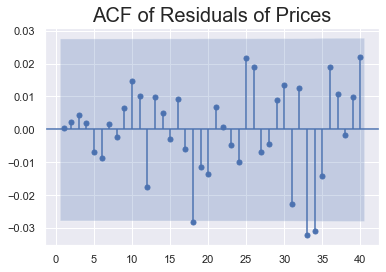

In [52]:
# get residuals
df['res_ar_5_ma_6'] = results_ar_5_ma_6.resid

# plot ACF
sgt.plot_acf(df.res_ar_5_ma_6, zero=False,lags=40)
plt.title("ACF of Residuals of Prices",size=20)
plt.show()

#### Didn't we say ARMA models perform poorly when modelling non-stationary data?

In [54]:
# Compare with ARMA(5,1) model for returns
print("\nARMA(5,6) Prices: LL = ", results_ar_5_ma_6.llf, "\tAIC = ", results_ar_5_ma_6.aic) 
print("\nARMA(5,1) Returns: LL = ", results_ret_ar_5_ma_1.llf, "\tAIC = ", results_ret_ar_5_ma_1.aic)


ARMA(5,6) Prices: LL =  -27587.86294851848 	AIC =  55201.72589703696

ARMA(5,1) Returns: LL =  -7889.311282945813 	AIC =  15794.622565891626


Now we see that the ARMA(5,1) model for returns performs much better than the ARMA(5,6) model for Prices.

#### Even though we *can* model prices using ARMA models, they perform much worse compared to their ability to estimate stationary  data.